In [1]:
import numpy as np
a = np.random.randn(4,3)
b = np.random.randn(3,2)
c =a.dot(b);
print (c)

[[ 2.51204693  0.5253901 ]
 [ 0.05981257 -1.63664282]
 [-1.63833639  1.57904298]
 [ 1.62786411 -1.67238813]]


In [2]:
c.shape()

TypeError: 'tuple' object is not callable

In [3]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from skimage import data, transform, exposure
from skimage.util import compare_images


img1 = data.coins()
img1_equalized = exposure.equalize_hist(img1)
img2 = transform.rotate(img1, 2)


comp_equalized = compare_images(img1, img1_equalized, method='checkerboard')
diff_rotated = compare_images(img1, img2, method='diff')
blend_rotated = compare_images(img1, img2, method='blend')


[]

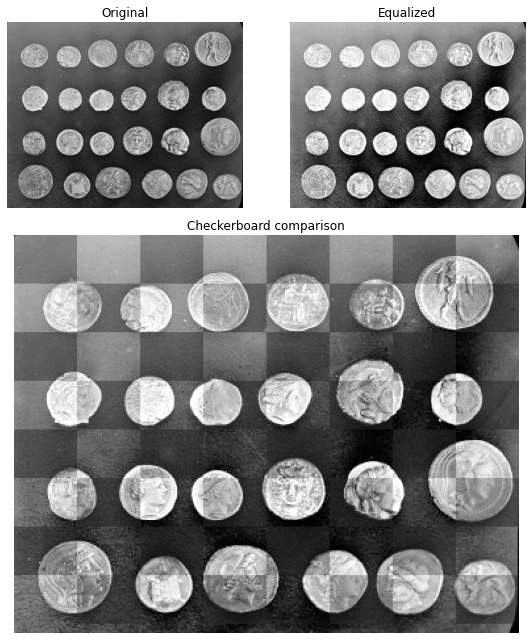

In [4]:
fig = plt.figure(figsize=(8, 9))

gs = GridSpec(3, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1:, :])

ax0.imshow(img1, cmap='gray')
ax0.set_title('Original')
ax1.imshow(img1_equalized, cmap='gray')
ax1.set_title('Equalized')
ax2.imshow(comp_equalized, cmap='gray')
ax2.set_title('Checkerboard comparison')
for a in (ax0, ax1, ax2):
    a.axis('off')
plt.tight_layout()
plt.plot()


In [5]:
import cv2

# load images
image1 = cv2.imread("left.jpg")
image2 = cv2.imread("right.jpg")

# compute difference
difference = cv2.subtract(image1, image2)

# color the mask red
Conv_hsv_Gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(Conv_hsv_Gray, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)
difference[mask != 255] = [0, 0, 255]

# add the red mask to the images to make the differences obvious
image1[mask != 255] = [0, 0, 255]
image2[mask != 255] = [0, 0, 255]

# store images
cv2.imwrite('diffOverImage1.png', image1)
cv2.imwrite('diffOverImage2.png', image1)
cv2.imwrite('diff.png', difference)

True

In [7]:
conda install -c menpo opencv

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\singh\Anaconda3

  added / updated specs:
    - opencv


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38haa95532_0         2.9 MB
    libopencv-4.0.1            |       hbb9e17c_0        28.6 MB
    opencv-4.0.1               |   py38h2a7c758_0          22 KB
    py-opencv-4.0.1            |   py38he44ac1e_0         1.5 MB
    ------------------------------------------------------------
                                           Total:        33.0 MB

The following NEW packages will be INSTALLED:

  libopencv          pkgs/main/win-64::libopencv-4.0.1-hbb9e17c_0
  opencv             pkgs/main/win-64::opencv-4.0.1-py38h2a7c758_0
  py-opencv          pkgs/main/win-64::py-opencv-4.0.1-py38he44ac1e_0

The following packages will be UPDATED:

  conda               

In [9]:
    !conda install opencv
    !conda install cv2

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - cv2

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [6]:
from skimage.measure import compare_ssim
import cv2
import numpy as np

before = cv2.imread('left.jpg')
after = cv2.imread('right.jpg')

# Convert images to grayscale
before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

# Compute SSIM between two images
(score, diff) = compare_ssim(before_gray, after_gray, full=True)
print("Image similarity", score)

# The diff image contains the actual image differences between the two images
# and is represented as a floating point data type in the range [0,1] 
# so we must convert the array to 8-bit unsigned integers in the range
# [0,255] before we can use it with OpenCV
diff = (diff * 255).astype("uint8")

# Threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

mask = np.zeros(before.shape, dtype='uint8')
filled_after = after.copy()

for c in contours:
    area = cv2.contourArea(c)
    if area > 40:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(after, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.drawContours(mask, [c], 0, (0,255,0), -1)
        cv2.drawContours(filled_after, [c], 0, (0,255,0), -1)

cv2.imshow('before', before)
cv2.imshow('after', after)
cv2.imshow('diff',diff)
cv2.imshow('mask',mask)
cv2.imshow('filled after',filled_after)
cv2.waitKey(0)

<ipython-input-6-dbcc164a140e>:13: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  (score, diff) = compare_ssim(before_gray, after_gray, full=True)


Image similarity 0.919886303405502


-1

In [7]:
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2
imageA = cv2.imread("left.jpg")
imageB = cv2.imread("right.jpg")
# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

In [8]:
!conda install imutils


PackagesNotFoundError: The following packages are not available from current channels:

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.




  - imutils

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




  Created wheel for imutils: filename=imutils-0.5.3-py3-none-any.whl size=25856 sha256=9ba10a0e07023668d1c984082fd744c8d84f1aa8a6d3b6fdadecb6926a8598e7
  Stored in directory: c:\users\singh\appdata\local\pip\cache\wheels\c8\d6\0f\b0c3892b70c59f0d202f8619a449f7d14cb839a0af2f943869
Successfully built imutils


In [2]:
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.919886303405502


<ipython-input-2-b04f85db3229>:1: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  (score, diff) = compare_ssim(grayA, grayB, full=True)


In [4]:
thresh = cv2.threshold(diff, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)


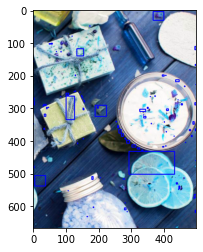

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
# loop over the contours
for c in cnts:
    # compute the bounding box of the contour and then draw the
    #bounding box on both input images to represent where the two
    # images differ
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)
    #print(1)
# show the output images
plt.imshow( imageA)


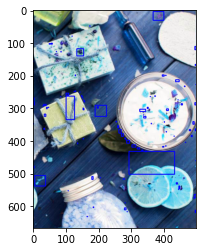

In [19]:
plt.imshow(imageB)


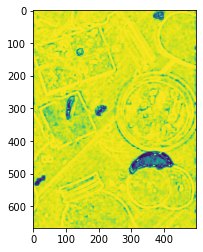

In [20]:
plt.imshow(diff)


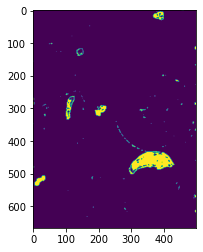

In [21]:
plt.imshow( thresh)
plt.show()